In [9]:
import numpy as np 
import pandas as pd
import sklearn

In [2]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

In [3]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- LabelEncoder()
- Train Test split 
- DesicionTreeClassifier()

In [4]:
my_data.shape

(200, 6)

In [5]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
my_data["Drug"].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [7]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
categorical_col = ["Sex", "BP", "Cholesterol","Drug"]

In [10]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    my_data[column] = label.fit_transform(my_data[column])
    
my_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [11]:
from sklearn.model_selection import train_test_split

X = my_data.drop('Drug', axis=1)
y = my_data.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
169,20,0,0,0,11.262
97,56,0,0,0,25.395
31,74,1,0,0,9.567
12,43,1,1,0,15.376
35,46,1,2,1,7.285
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [18]:
y_train

169    0
97     4
31     1
12     4
35     3
      ..
106    3
14     3
92     4
179    4
102    2
Name: Drug, Length: 140, dtype: int32

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı Modelinin Oluşturulması:
tree = DecisionTreeClassifier(criterion="entropy",random_state=42)

"""
DecisionTreeClassifier kullanılarak bir karar ağacı modeli oluşturuluyor. 
random_state=42 parametresi, modelin her seferinde aynı şekilde eğitilmesini sağlamak için kullanılıyor (yani sonuçlar tekrarlanabilir oluyor).
"""
tree.fit(X_train, y_train)

"""
Oluşturulan karar ağacı modeli, fit metodu kullanılarak X_train (eğitim verileri) ve y_train (eğitim etiketleri) ile eğitiliyor. 
Bu süreçte model, verilen verilerden öğreniyor ve bir sınıflandırma yapısı oluşturuyor.
"""

'\nOluşturulan karar ağacı modeli, fit metodu kullanılarak X_train (eğitim verileri) ve y_train (eğitim etiketleri) ile eğitiliyor. \nBu süreçte model, verilen verilerden öğreniyor ve bir sınıflandırma yapısı oluşturuyor.\n'

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = tree.predict(X_train)
print(f"Accuracy Score: {accuracy_score(y_train, y_pred)}")

Accuracy Score: 1.0


In [23]:
print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_pred)}\n")

Confusion Matrix: 
 [[16  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 65]]



In [25]:
features = list(my_data.columns)
features.remove("Drug")

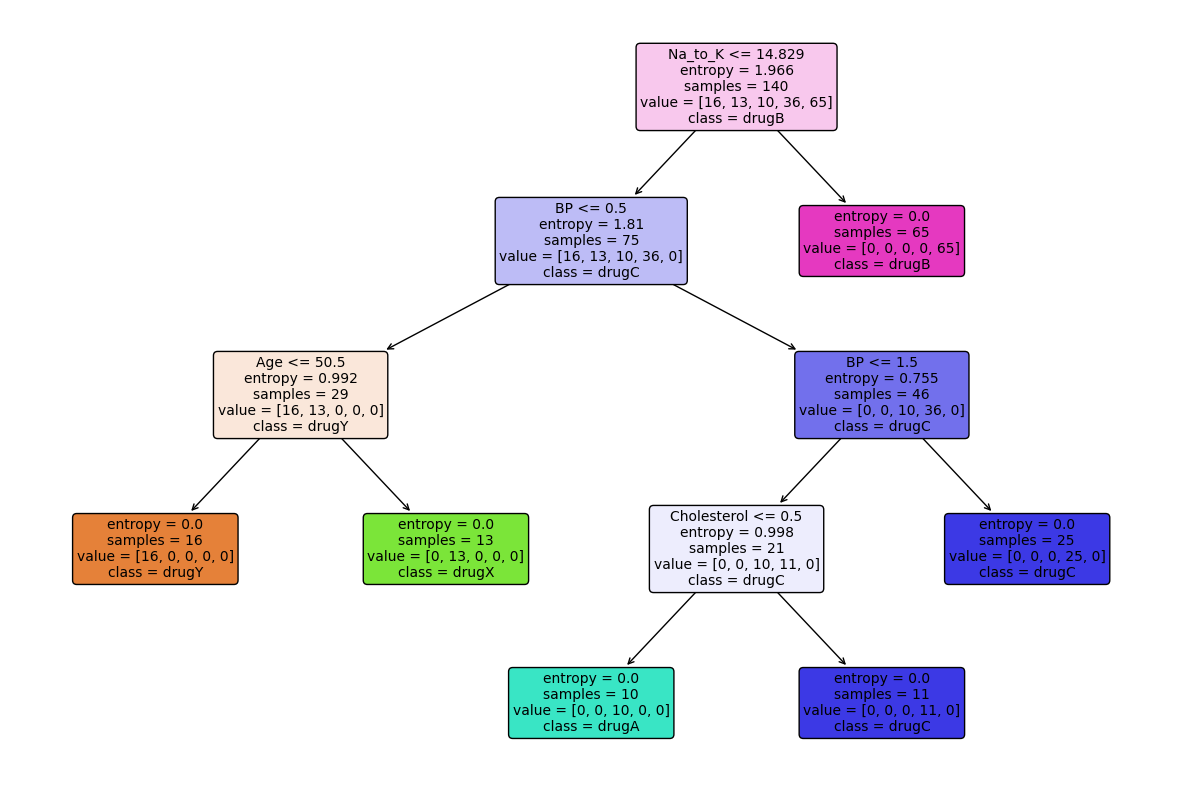

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["drugY", "drugX", "drugA", "drugC", "drugB"], rounded=True, fontsize=10)
plt.show()